# Xiaotang Chai--xiaotangchai--4691635851

In [73]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import math
from sklearn.neighbors import NearestNeighbors

In [74]:
data=pd.read_csv("/Users/chaixiaotang/Documents/GitHub/homework-1-xiaotangchai/data/vertebral_column_data/column_2C.dat",sep='\s+',header=None)

In [75]:
df = pd.DataFrame(data)

In [76]:
df.columns=["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis","class"]

In [77]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [78]:
df["class1"]=0

In [79]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,class1
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,0
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,0
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,0
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,0
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,0


In [80]:
for i in range(310):
  if df["class"][i]=="AB":
        df["class1"][i]=1
  elif df["class"][i]=="NO":
        df["class1"][i]=0      

<ipython-input-80-f823aa54a92f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["class1"][i]=1
<ipython-input-80-f823aa54a92f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["class1"][i]=0


In [81]:
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,class1
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,1
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,1
...,...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO,0
308,45.25,8.69,41.58,36.56,118.55,0.21,NO,0


In [82]:
df2=df.drop(["class"],axis=1)
df2.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class1
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


# Question B (i)

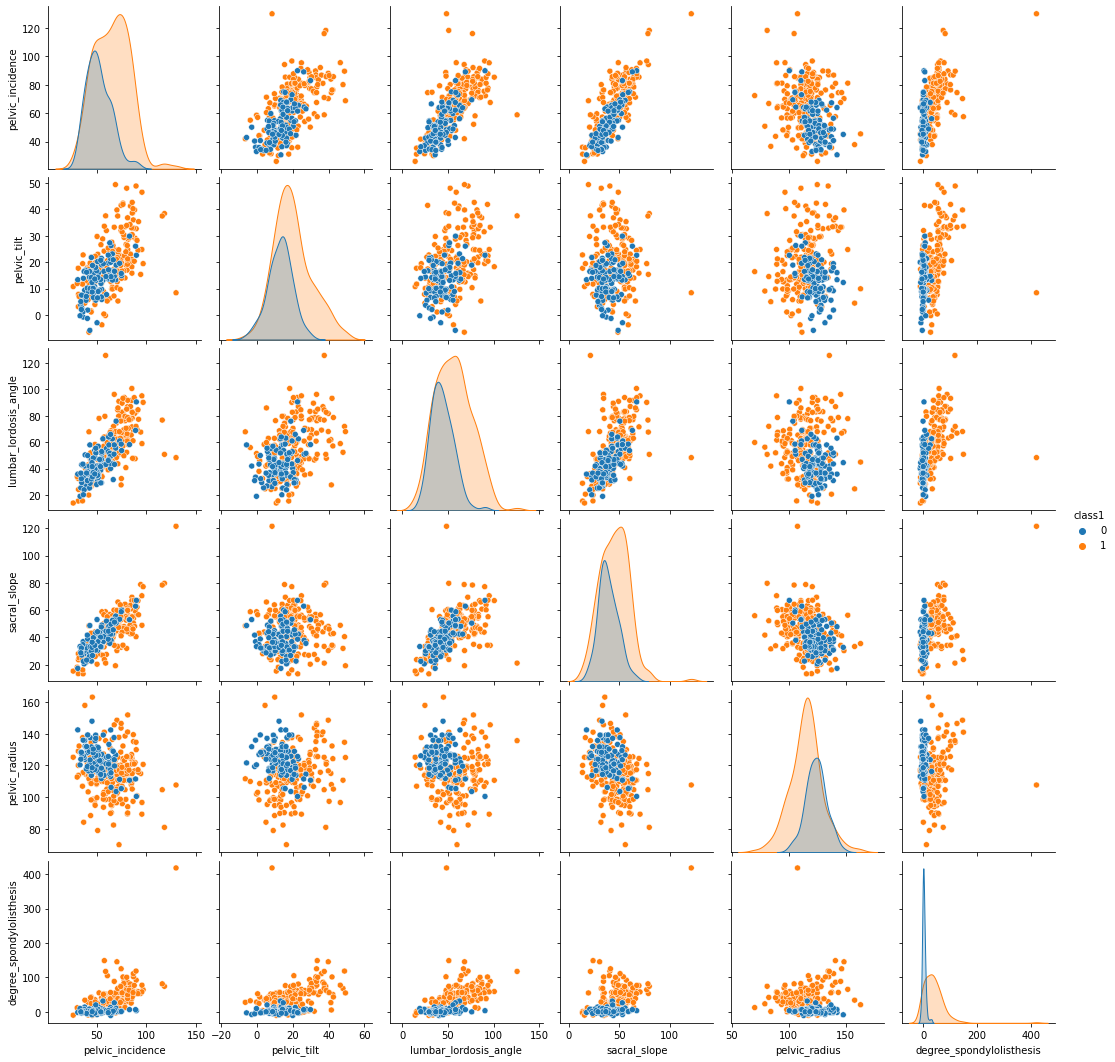

In [83]:
sns.pairplot(df2, hue="class1")

# Question B (ii)

In [84]:
plt.figure(figsize=(9, 9))

<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

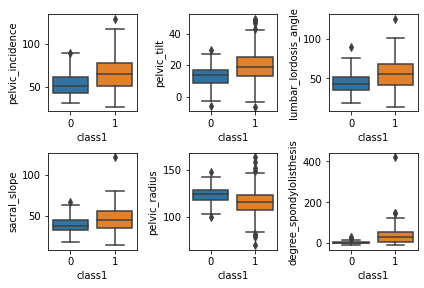

In [85]:
plt.subplot(2,3,1)
sns.boxplot(x=df['class1'],y=df['pelvic_incidence'])
plt.subplot(2,3,2)
sns.boxplot(x=df['class1'],y=df['pelvic_tilt'])
plt.subplot(2,3,3)
sns.boxplot(x=df['class1'],y=df['lumbar_lordosis_angle'])
plt.subplot(2,3,4)
sns.boxplot(x=df['class1'],y=df['sacral_slope'])
plt.subplot(2,3,5)
sns.boxplot(x=df['class1'],y=df['pelvic_radius'])
plt.subplot(2,3,6)
sns.boxplot(x=df['class1'],y=df['degree_spondylolisthesis'])
plt.tight_layout()
plt.show()

In [86]:
df2_0=df2.loc[df['class1']==0]
df2_1=df2.loc[df['class1']==1]

In [87]:
df2_0.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class1
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0


In [88]:
df2_1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class1
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


In [89]:
df2_0_1=df2_0.iloc[:70]
df2_1_2=df2_1.iloc[:140]

In [90]:
df2_0_1

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class1
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
275,67.29,16.72,51.00,50.57,137.59,4.96,0
276,51.33,13.63,33.26,37.69,131.31,1.79,0
277,65.76,13.21,44.00,52.55,129.39,-1.98,0
278,40.41,-1.33,30.98,41.74,119.34,-6.17,0


In [91]:
df2_1_2

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class1
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
135,77.12,30.35,77.48,46.77,110.61,82.09,1
136,88.02,39.84,81.77,48.18,116.60,56.77,1
137,83.40,34.31,78.42,49.09,110.47,49.67,1
138,72.05,24.70,79.87,47.35,107.17,56.43,1


In [92]:
train_set=pd.concat([df2_0_1,df2_1_2],axis=0,ignore_index=True)

In [93]:
train_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class1
0,38.51,16.96,35.11,21.54,127.63,7.99,0
1,54.92,18.97,51.60,35.95,125.85,2.00,0
2,44.36,8.95,46.90,35.42,129.22,4.99,0
3,48.32,17.45,48.00,30.87,128.98,-0.91,0
4,45.70,10.66,42.58,35.04,130.18,-3.39,0
...,...,...,...,...,...,...,...
205,77.12,30.35,77.48,46.77,110.61,82.09,1
206,88.02,39.84,81.77,48.18,116.60,56.77,1
207,83.40,34.31,78.42,49.09,110.47,49.67,1
208,72.05,24.70,79.87,47.35,107.17,56.43,1


In [94]:
df2_0_2=df2_0.iloc[70:]
df2_1_3=df2_1.iloc[140:]

In [95]:
test_set=pd.concat([df2_0_2,df2_1_3],axis=0,ignore_index=True)

In [96]:
test_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class1
0,50.09,13.43,34.46,36.66,119.13,3.09,0
1,64.26,14.50,43.90,49.76,115.39,5.95,0
2,53.68,13.45,41.58,40.24,113.91,2.74,0
3,49.00,13.11,51.87,35.88,126.40,0.54,0
4,59.17,14.56,43.20,44.60,121.04,2.83,0
...,...,...,...,...,...,...,...
95,80.11,33.94,85.10,46.17,125.59,100.29,1
96,95.48,46.55,59.00,48.93,96.68,77.28,1
97,74.09,18.82,76.03,55.27,128.41,73.39,1
98,87.68,20.37,93.82,67.31,120.94,76.73,1


In [97]:
X_train=train_set.iloc[:,0:6]
y_train=train_set["class1"]
X_test=test_set.iloc[:,0:6]
y_test=test_set["class1"]

# Question C

In [98]:
test_error=[]
train_error=[]
n=[]
test_error_dic={}

In [99]:
for i in range(70):
    k=1+3*i
    model=KNeighborsClassifier(n_neighbors=k)
    n.append(k)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    test_acc_score=accuracy_score(y_pred,y_test)
    t_error=1-test_acc_score
    test_error.append(t_error)
    test_error_dic[k]=t_error
    y_pred2=model.predict(X_train)
    train_acc_score=accuracy_score(y_pred2,y_train)
    train_er=1-train_acc_score
    train_error.append(train_er)
    print('k is', k, 'test error is', t_error)

k is 1 test error is 0.13
k is 4 test error is 0.06000000000000005
k is 7 test error is 0.12
k is 10 test error is 0.09999999999999998
k is 13 test error is 0.12
k is 16 test error is 0.08999999999999997
k is 19 test error is 0.10999999999999999
k is 22 test error is 0.09999999999999998
k is 25 test error is 0.10999999999999999
k is 28 test error is 0.09999999999999998
k is 31 test error is 0.10999999999999999
k is 34 test error is 0.10999999999999999
k is 37 test error is 0.10999999999999999
k is 40 test error is 0.09999999999999998
k is 43 test error is 0.12
k is 46 test error is 0.12
k is 49 test error is 0.10999999999999999
k is 52 test error is 0.10999999999999999
k is 55 test error is 0.12
k is 58 test error is 0.12
k is 61 test error is 0.12
k is 64 test error is 0.12
k is 67 test error is 0.13
k is 70 test error is 0.12
k is 73 test error is 0.13
k is 76 test error is 0.12
k is 79 test error is 0.13
k is 82 test error is 0.14
k is 85 test error is 0.16000000000000003
k is 88 te

Text(0, 0.5, 'Test Error')

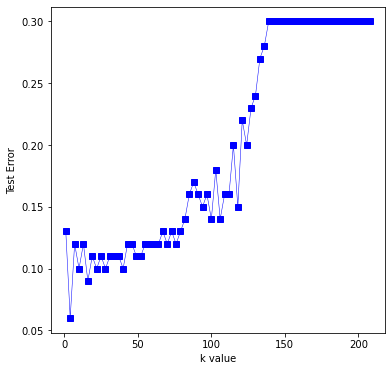

In [100]:
plt.figure(figsize=(6,6))
plt.plot(n,test_error,'s-',linewidth=0.5, color = 'b')
plt.xlabel('k value')
plt.ylabel('Test Error')

Text(0, 0.5, 'Train Error')

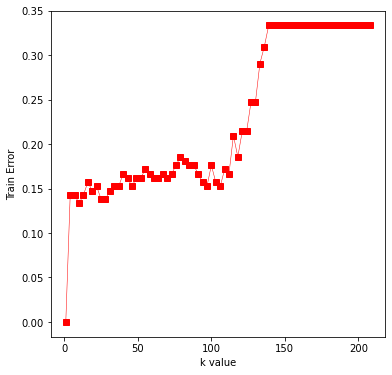

In [101]:
plt.figure(figsize=(6,6))
plt.plot(n,train_error,'s-',linewidth=0.5, color = 'r')
plt.xlabel('k value')
plt.ylabel('Train Error')

In [102]:
min_test_error=min(test_error)
min_test_error

0.06000000000000005

In [103]:
def get_key (dict, value):
    return [k for k, v in dict.items() if v == value]

In [104]:
k_best=get_key(test_error_dic,min_test_error)
k_best
print('the best K is', k_best)

the best K is [4]


In [105]:
knn=KNeighborsClassifier(n_neighbors=4,metric='euclidean')

In [106]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [107]:
y_predict=knn.predict(X_test)

In [108]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[25,  5],
       [ 1, 69]])

In [109]:
TP = cm[1][1]
FN = cm[1][0]
TN = cm[0][0]
FP = cm[0][1]

In [110]:
true_positive_rate=TP/(TP+FN)
print('true_positive_rate is',true_positive_rate)

true_positive_rate is 0.9857142857142858


In [111]:
true_negative_rate=TN/(TN +FP)
print('true_negative_rate is',true_negative_rate)

true_negative_rate is 0.8333333333333334


In [112]:
precision=(TP)/(TP+FP)
print('precision is',precision)

precision is 0.9324324324324325


In [113]:
F1= f1_score(y_test, y_predict)
print('F1-score is',F1)

F1-score is 0.9583333333333333


In [114]:
n1=[]
test_error_rate=[]
test_error_dic1={}
min_ter1=[]
k_best1=[]

In [115]:
for N in range(10,211,10):
    print('N is', N)
    df2_0_3=df2_0_1.iloc[:N//3]
    df2_1_4=df2_1_2.iloc[:N-(N//3)]
    training_set=pd.concat([df2_0_3,df2_1_4],axis=0,ignore_index=True)
    X_train1=training_set.iloc[:,0:6]
    y_train1=training_set["class1"]
    for i in range(40):
        k=1+5*i
        if k<=N:
            model1=KNeighborsClassifier(n_neighbors=k)
            n1.append(k)
            model1.fit(X_train1,y_train1)
            y_pred1=model1.predict(X_test)
            test_acc_score1=accuracy_score(y_pred1,y_test)
            t_error1=1-test_acc_score1
            test_error_rate.append(t_error1)
            test_error_dic1[k]=t_error1
            print('k is ',k,'test_error is',t_error1)
    min_ter=min(test_error_rate)
    min_ter1.append(min_ter)

N is 10
k is  1 test_error is 0.25
k is  6 test_error is 0.32999999999999996
N is 20
k is  1 test_error is 0.21999999999999997
k is  6 test_error is 0.19999999999999996
k is  11 test_error is 0.29000000000000004
k is  16 test_error is 0.30000000000000004
N is 30
k is  1 test_error is 0.21999999999999997
k is  6 test_error is 0.24
k is  11 test_error is 0.26
k is  16 test_error is 0.26
k is  21 test_error is 0.30000000000000004
k is  26 test_error is 0.30000000000000004
N is 40
k is  1 test_error is 0.76
k is  6 test_error is 0.30000000000000004
k is  11 test_error is 0.25
k is  16 test_error is 0.26
k is  21 test_error is 0.30000000000000004
k is  26 test_error is 0.30000000000000004
k is  31 test_error is 0.30000000000000004
k is  36 test_error is 0.30000000000000004
N is 50
k is  1 test_error is 0.78
k is  6 test_error is 0.6799999999999999
k is  11 test_error is 0.38
k is  16 test_error is 0.31000000000000005
k is  21 test_error is 0.31000000000000005
k is  26 test_error is 0.300000

k is  81 test_error is 0.28
k is  86 test_error is 0.28
k is  91 test_error is 0.30000000000000004
k is  96 test_error is 0.30000000000000004
k is  101 test_error is 0.30000000000000004
k is  106 test_error is 0.30000000000000004
k is  111 test_error is 0.30000000000000004
k is  116 test_error is 0.30000000000000004
k is  121 test_error is 0.30000000000000004
k is  126 test_error is 0.30000000000000004
k is  131 test_error is 0.30000000000000004
k is  136 test_error is 0.30000000000000004
k is  141 test_error is 0.30000000000000004
k is  146 test_error is 0.30000000000000004
N is 160
k is  1 test_error is 0.16000000000000003
k is  6 test_error is 0.13
k is  11 test_error is 0.14
k is  16 test_error is 0.13
k is  21 test_error is 0.14
k is  26 test_error is 0.14
k is  31 test_error is 0.17000000000000004
k is  36 test_error is 0.17000000000000004
k is  41 test_error is 0.18999999999999995
k is  46 test_error is 0.18999999999999995
k is  51 test_error is 0.18999999999999995
k is  56 test

k is  116 test_error is 0.18000000000000005
k is  121 test_error is 0.21999999999999997
k is  126 test_error is 0.20999999999999996
k is  131 test_error is 0.26
k is  136 test_error is 0.28
k is  141 test_error is 0.30000000000000004
k is  146 test_error is 0.30000000000000004
k is  151 test_error is 0.30000000000000004
k is  156 test_error is 0.30000000000000004
k is  161 test_error is 0.30000000000000004
k is  166 test_error is 0.30000000000000004
k is  171 test_error is 0.30000000000000004
k is  176 test_error is 0.30000000000000004
k is  181 test_error is 0.30000000000000004
k is  186 test_error is 0.30000000000000004
k is  191 test_error is 0.30000000000000004
k is  196 test_error is 0.30000000000000004


Text(0.5, 1.0, 'Learning Curve')

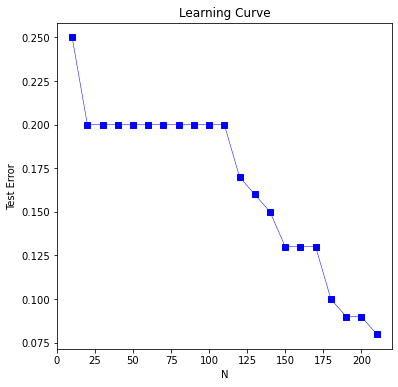

In [116]:
plt.figure(figsize=(6,6))
plt.plot(range(10,211,10),min_ter1,'s-',linewidth=0.5, color = 'b')
plt.xlabel('N')
plt.ylabel('Test Error')
plt.title('Learning Curve')

# Question D

In [117]:
test_error_d=[]
n_d=[]
test_error_dic_d={}

In [118]:
for i in range(40):
    k=1+5*i
    model_d=KNeighborsClassifier(n_neighbors=k,metric='manhattan',p=1)
    n_d.append(k)
    model_d.fit(X_train,y_train)
    y_pred_d=model_d.predict(X_test)
    test_acc_score_d=accuracy_score(y_pred_d,y_test)
    t_error=1-test_acc_score_d
    test_error_d.append(t_error)
    test_error_dic_d[k]=t_error
    y_pred_d2=model_d.predict(X_train)
    train_acc_score_d=accuracy_score(y_pred_d2,y_train)
    train_er_d=1-train_acc_score_d
    train_error.append(train_er_d)
    print('k is', k, 'test error is', t_error)

k is 1 test error is 0.12
k is 6 test error is 0.10999999999999999
k is 11 test error is 0.10999999999999999
k is 16 test error is 0.12
k is 21 test error is 0.12
k is 26 test error is 0.10999999999999999
k is 31 test error is 0.12
k is 36 test error is 0.13
k is 41 test error is 0.13
k is 46 test error is 0.13
k is 51 test error is 0.14
k is 56 test error is 0.13
k is 61 test error is 0.15000000000000002
k is 66 test error is 0.15000000000000002
k is 71 test error is 0.14
k is 76 test error is 0.14
k is 81 test error is 0.16000000000000003
k is 86 test error is 0.15000000000000002
k is 91 test error is 0.19999999999999996
k is 96 test error is 0.19999999999999996
k is 101 test error is 0.21999999999999997
k is 106 test error is 0.20999999999999996
k is 111 test error is 0.22999999999999998
k is 116 test error is 0.20999999999999996
k is 121 test error is 0.21999999999999997
k is 126 test error is 0.24
k is 131 test error is 0.28
k is 136 test error is 0.28
k is 141 test error is 0.300

In [119]:
min_test_error_d=min(test_error_d)
min_test_error_d

0.10999999999999999

In [120]:
best_k=get_key(test_error_dic_d,min_test_error_d)
best_k
print('the min_test_error is',min_test_error_d,'and the best k are', best_k)

the min_test_error is 0.10999999999999999 and the best k are [6, 11, 26]


# Question D (i)(B)

In [121]:
test_error_d1=[]
p_d1=[]
test_error_dic_d1={}

In [122]:
for k in best_k:
    print('k :', k)
    for j in range(0,10,1):
        a=0.1+0.1*j
        P=10**a
        model_d1=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=P)
        p_d1.append(P)
        model_d1.fit(X_train,y_train)
        y_pred_d1=model_d1.predict(X_test)
        test_acc_score_d1=accuracy_score(y_pred_d1,y_test)
        t_error=1-test_acc_score_d1
        test_error_d1.append(t_error)
        y_pred_d3=model_d1.predict(X_train)
        train_acc_score_d3=accuracy_score(y_pred_d3,y_train)
        train_er_d3=1-train_acc_score_d3
        train_error.append(train_er_d3)
        print('log(p) is', a , 'test error is', t_error)

k : 6
log(p) is 0.1 test error is 0.08999999999999997
log(p) is 0.2 test error is 0.08999999999999997
log(p) is 0.30000000000000004 test error is 0.07999999999999996
log(p) is 0.4 test error is 0.07999999999999996
log(p) is 0.5 test error is 0.07999999999999996
log(p) is 0.6 test error is 0.06000000000000005
log(p) is 0.7000000000000001 test error is 0.06999999999999995
log(p) is 0.8 test error is 0.07999999999999996
log(p) is 0.9 test error is 0.08999999999999997
log(p) is 1.0 test error is 0.08999999999999997
k : 11
log(p) is 0.1 test error is 0.10999999999999999
log(p) is 0.2 test error is 0.10999999999999999
log(p) is 0.30000000000000004 test error is 0.12
log(p) is 0.4 test error is 0.12
log(p) is 0.5 test error is 0.12
log(p) is 0.6 test error is 0.12
log(p) is 0.7000000000000001 test error is 0.12
log(p) is 0.8 test error is 0.10999999999999999
log(p) is 0.9 test error is 0.10999999999999999
log(p) is 1.0 test error is 0.10999999999999999
k : 26
log(p) is 0.1 test error is 0.099

In [123]:
print('the minimam test error is', min(test_error_d1), ', when k is 6 and the log(p) is 0.6,so the best log(p) is 0.6')

the minimam test error is 0.06000000000000005 , when k is 6 and the log(p) is 0.6,so the best log(p) is 0.6


# Question D (i)(C)

In [124]:
test_error_d2=[]
n_d2=[]
test_error_dic_d2={}

In [125]:
for i in range(40):
    k=1+5*i
    model_d2=KNeighborsClassifier(n_neighbors=k,metric='chebyshev',p=math.inf)
    n_d2.append(k)
    model_d2.fit(X_train,y_train)
    y_pred_d2=model_d2.predict(X_test)
    test_acc_score_d2=accuracy_score(y_pred_d2,y_test)
    t_error=1-test_acc_score_d2
    test_error_d2.append(t_error)
    test_error_dic_d2[k]=t_error
    y_pred_d4=model_d2.predict(X_train)
    train_acc_score_d4=accuracy_score(y_pred_d4,y_train)
    train_er_d4=1-train_acc_score_d4
    train_error.append(train_er_d4)
    print('k is', k, 'test error is', t_error)

k is 1 test error is 0.13
k is 6 test error is 0.09999999999999998
k is 11 test error is 0.12
k is 16 test error is 0.07999999999999996
k is 21 test error is 0.10999999999999999
k is 26 test error is 0.12
k is 31 test error is 0.12
k is 36 test error is 0.09999999999999998
k is 41 test error is 0.13
k is 46 test error is 0.12
k is 51 test error is 0.12
k is 56 test error is 0.12
k is 61 test error is 0.14
k is 66 test error is 0.13
k is 71 test error is 0.14
k is 76 test error is 0.10999999999999999
k is 81 test error is 0.14
k is 86 test error is 0.12
k is 91 test error is 0.15000000000000002
k is 96 test error is 0.14
k is 101 test error is 0.18999999999999995
k is 106 test error is 0.18000000000000005
k is 111 test error is 0.18000000000000005
k is 116 test error is 0.18000000000000005
k is 121 test error is 0.20999999999999996
k is 126 test error is 0.20999999999999996
k is 131 test error is 0.25
k is 136 test error is 0.28
k is 141 test error is 0.30000000000000004
k is 146 test e

In [126]:
min_ter_d2=min(test_error_d2)
min_ter_d2

0.07999999999999996

In [127]:
k_best=get_key(test_error_dic_d2,min_ter_d2)
print('the min_test_error is',min_ter_d2,'the best k is',k_best)

the min_test_error is 0.07999999999999996 the best k is [16]


# Question D (ii)

In [128]:
test_error_d3=[]
n_d3=[]
test_error_dic_d3={}

In [129]:
for i in range(40):
    k=1+5*i
    model_d3 = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis',metric_params={'V': np.cov(X_train, rowvar=False)})
    n_d3.append(k)
    model_d3.fit(X_train,y_train)
    y_pred_d3=model_d3.predict(X_test)
    test_acc_score_d3=accuracy_score(y_pred_d3,y_test)
    t_error=1-test_acc_score_d3
    test_error_d3.append(t_error)
    test_error_dic_d3[k]=t_error
    y_pred_d5=model_d3.predict(X_train)
    train_acc_score_d5=accuracy_score(y_pred_d5,y_train)
    train_er_d5=1-train_acc_score_d5
    train_error.append(train_er_d5)
    print('k is', k, 'test error is', t_error)

k is 1 test error is 0.17000000000000004
k is 6 test error is 0.17000000000000004
k is 11 test error is 0.19999999999999996
k is 16 test error is 0.19999999999999996
k is 21 test error is 0.20999999999999996
k is 26 test error is 0.19999999999999996
k is 31 test error is 0.22999999999999998
k is 36 test error is 0.20999999999999996
k is 41 test error is 0.24
k is 46 test error is 0.24
k is 51 test error is 0.24
k is 56 test error is 0.26
k is 61 test error is 0.25
k is 66 test error is 0.27
k is 71 test error is 0.26
k is 76 test error is 0.25
k is 81 test error is 0.24
k is 86 test error is 0.26
k is 91 test error is 0.26
k is 96 test error is 0.26
k is 101 test error is 0.28
k is 106 test error is 0.29000000000000004
k is 111 test error is 0.29000000000000004
k is 116 test error is 0.29000000000000004
k is 121 test error is 0.30000000000000004
k is 126 test error is 0.30000000000000004
k is 131 test error is 0.30000000000000004
k is 136 test error is 0.30000000000000004
k is 141 test

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  war

k is 156 test error is 0.30000000000000004
k is 161 test error is 0.30000000000000004
k is 166 test error is 0.30000000000000004
k is 171 test error is 0.30000000000000004
k is 176 test error is 0.30000000000000004
k is 181 test error is 0.30000000000000004
k is 186 test error is 0.30000000000000004
k is 191 test error is 0.30000000000000004
k is 196 test error is 0.30000000000000004


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  warnings.warn("from version 0.25, pairwise_distances for "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1460: FutureWarning: from version 0.25, pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.
  war

In [130]:
min_ter_d3=min(test_error_d3)
min_ter_d3

0.17000000000000004

In [131]:
k_best3=get_key(test_error_dic_d3,min_ter_d3)
print('the min_test_error is',min_ter_d3,'the best k is',k_best3)

the min_test_error is 0.17000000000000004 the best k is [1, 6]


# Question E

In [132]:
test_error_e=[]
n_e=[]
test_error_dic_e={}

In [133]:
for i in range(40):
    k=1+5*i
    model_e = KNeighborsClassifier(n_neighbors=k, metric='euclidean',weights='distance')
    n_e.append(k)
    model_e.fit(X_train,y_train)
    y_pred_e=model_e.predict(X_test)
    test_acc_score_e=accuracy_score(y_pred_e,y_test)
    t_error=1-test_acc_score_e
    test_error_e.append(t_error)
    test_error_dic_e[k]=t_error
    y_pred_d6=model_e.predict(X_train)
    train_acc_score_d6=accuracy_score(y_pred_d6,y_train)
    train_er_d6=1-train_acc_score_d6
    train_error.append(train_er_d6)
    print('k is', k, 'test error is', t_error)

k is 1 test error is 0.13
k is 6 test error is 0.09999999999999998
k is 11 test error is 0.12
k is 16 test error is 0.10999999999999999
k is 21 test error is 0.10999999999999999
k is 26 test error is 0.10999999999999999
k is 31 test error is 0.10999999999999999
k is 36 test error is 0.10999999999999999
k is 41 test error is 0.10999999999999999
k is 46 test error is 0.10999999999999999
k is 51 test error is 0.10999999999999999
k is 56 test error is 0.10999999999999999
k is 61 test error is 0.10999999999999999
k is 66 test error is 0.10999999999999999
k is 71 test error is 0.10999999999999999
k is 76 test error is 0.12
k is 81 test error is 0.13
k is 86 test error is 0.13
k is 91 test error is 0.14
k is 96 test error is 0.14
k is 101 test error is 0.12
k is 106 test error is 0.14
k is 111 test error is 0.14
k is 116 test error is 0.13
k is 121 test error is 0.13
k is 126 test error is 0.13
k is 131 test error is 0.14
k is 136 test error is 0.14
k is 141 test error is 0.17000000000000004


In [134]:
min_ter_e=min(test_error_e)
min_ter_e

0.09999999999999998

In [135]:
k_best_e=get_key(test_error_dic_e,min_ter_e)
print('With  Euclidean, the min_test_error is',min_ter_e,'the best k is',k_best_e)

With  Euclidean, the min_test_error is 0.09999999999999998 the best k is [6]


In [136]:
test_error_e1=[]
n_e1=[]
test_error_dic_e1={}

In [137]:
for i in range(40):
    k=1+5*i
    model_e1=KNeighborsClassifier(n_neighbors=k,metric='manhattan',weights='distance')
    n_e1.append(k)
    model_e1.fit(X_train,y_train)
    y_pred_e1=model_e1.predict(X_test)
    test_acc_score_e1=accuracy_score(y_pred_e1,y_test)
    t_error=1-test_acc_score_e1
    test_error_e1.append(t_error)
    test_error_dic_e1[k]=t_error
    y_pred_d7=model_e1.predict(X_train)
    train_acc_score_d7=accuracy_score(y_pred_d7,y_train)
    train_er_d7=1-train_acc_score_d7
    train_error.append(train_er_d7)
    print('k is', k, 'test error is', t_error)

k is 1 test error is 0.12
k is 6 test error is 0.10999999999999999
k is 11 test error is 0.10999999999999999
k is 16 test error is 0.12
k is 21 test error is 0.10999999999999999
k is 26 test error is 0.09999999999999998
k is 31 test error is 0.10999999999999999
k is 36 test error is 0.10999999999999999
k is 41 test error is 0.10999999999999999
k is 46 test error is 0.10999999999999999
k is 51 test error is 0.12
k is 56 test error is 0.12
k is 61 test error is 0.13
k is 66 test error is 0.13
k is 71 test error is 0.10999999999999999
k is 76 test error is 0.12
k is 81 test error is 0.14
k is 86 test error is 0.14
k is 91 test error is 0.13
k is 96 test error is 0.13
k is 101 test error is 0.15000000000000002
k is 106 test error is 0.15000000000000002
k is 111 test error is 0.15000000000000002
k is 116 test error is 0.15000000000000002
k is 121 test error is 0.15000000000000002
k is 126 test error is 0.15000000000000002
k is 131 test error is 0.15000000000000002
k is 136 test error is 0.1

In [138]:
min_ter_e1=min(test_error_e1)
min_ter_e1

0.09999999999999998

In [139]:
k_best_e1=get_key(test_error_dic_e1,min_ter_e1)
print('With Manhattan, the min_test_error is',min_ter_e1,'the best k is',k_best_e1)

With Manhattan, the min_test_error is 0.09999999999999998 the best k is [26]


In [140]:
test_error_e2=[]
n_e2=[]
test_error_dic_e2={}

In [141]:
for i in range(40):
    k=1+5*i
    model_e2=KNeighborsClassifier(n_neighbors=k,metric='chebyshev',weights='distance')
    n_e2.append(k)
    model_e2.fit(X_train,y_train)
    y_pred_e2=model_e2.predict(X_test)
    test_acc_score_e2=accuracy_score(y_pred_e2,y_test)
    t_error=1-test_acc_score_e2
    test_error_e2.append(t_error)
    test_error_dic_e2[k]=t_error
    y_pred_d8=model_e2.predict(X_train)
    train_acc_score_d8=accuracy_score(y_pred_d8,y_train)
    train_er_d8=1-train_acc_score_d8
    train_error.append(train_er_d8)
    print('k is', k, 'test error is', t_error)

k is 1 test error is 0.13
k is 6 test error is 0.13
k is 11 test error is 0.12
k is 16 test error is 0.10999999999999999
k is 21 test error is 0.12
k is 26 test error is 0.12
k is 31 test error is 0.10999999999999999
k is 36 test error is 0.10999999999999999
k is 41 test error is 0.10999999999999999
k is 46 test error is 0.12
k is 51 test error is 0.12
k is 56 test error is 0.12
k is 61 test error is 0.10999999999999999
k is 66 test error is 0.13
k is 71 test error is 0.12
k is 76 test error is 0.12
k is 81 test error is 0.12
k is 86 test error is 0.14
k is 91 test error is 0.13
k is 96 test error is 0.14
k is 101 test error is 0.14
k is 106 test error is 0.14
k is 111 test error is 0.14
k is 116 test error is 0.14
k is 121 test error is 0.15000000000000002
k is 126 test error is 0.14
k is 131 test error is 0.16000000000000003
k is 136 test error is 0.16000000000000003
k is 141 test error is 0.18000000000000005
k is 146 test error is 0.18999999999999995
k is 151 test error is 0.2099999

In [142]:
min_ter_e2=min(test_error_e2)
min_ter_e2

0.10999999999999999

In [143]:
k_best_e2=get_key(test_error_dic_e2,min_ter_e2)
print('With  Chebyshev, the min_test_error is',min_ter_e2,'the best k is',k_best_e2)

With  Chebyshev, the min_test_error is 0.10999999999999999 the best k is [16, 31, 36, 41, 61]


# Question F

In [144]:
m_train_error=min(train_error)
print('the lowest training error rate is ',m_train_error)

the lowest training error rate is  0.0
